In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
password = getpass.getpass()

········


### 1- Create an SQL query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features

### 2- Read the data into a Pandas dataframe

In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''
select * from log_regression_model;
'''

data = pd.read_sql_query(query, engine)
data

,film_id,new_name,rental_duration,price,new_length,nb_rentals
0,1,Documentary,6,0.99,86,23
1,2,Horror,3,4.99,48,7
2,3,Documentary,7,2.99,50,12
3,4,Horror,5,2.99,117,23
4,5,Family,6,2.99,130,12
...,...,...,...,...,...,...
953,996,Documentary,6,0.99,183,7
954,997,Music,4,0.99,179,6
955,998,Horror,6,0.99,105,9
956,999,Children,5,2.99,101,17


### 3- Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables

In [3]:
data.dtypes

film_id              int64
new_name            object
rental_duration      int64
price              float64
new_length           int64
nb_rentals           int64
dtype: object

In [4]:
data.isna().sum()

film_id            0
new_name           0
rental_duration    0
price              0
new_length         0
nb_rentals         0
dtype: int64

In [5]:
data['price'] = data['price'].astype('object')
data['rental_duration'] = data['rental_duration'].astype('object')

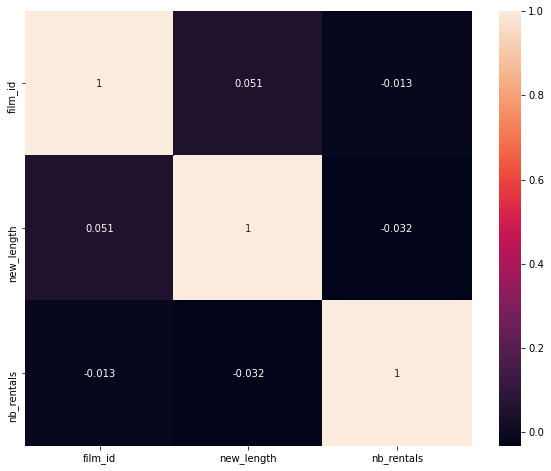

In [6]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

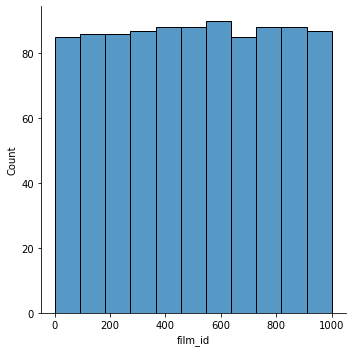

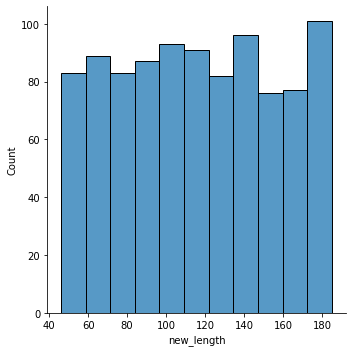

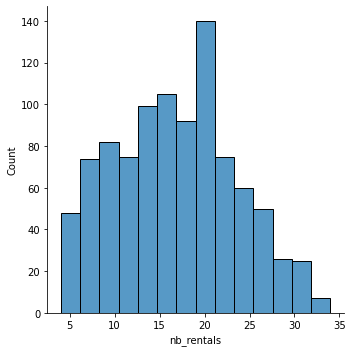

In [7]:
for col in data.select_dtypes(np.number):
    sns.displot(data[col])
    plt.show()

In [8]:
X_cat = data['new_name'] 

In [9]:
X_cat.value_counts()

Sports         73
Family         67
Foreign        67
Animation      64
Documentary    63
Action         61
Drama          61
New            60
Sci-Fi         59
Children       58
Games          58
Comedy         56
Classics       54
Travel         53
Horror         53
Music          51
Name: new_name, dtype: int64

In [10]:
cat_data = pd.get_dummies(X_cat, drop_first=True)
cat_data[:20]

,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [18]:
pd.concat([data, cat_data], axis=1)

,film_id,rental_duration,price,new_length,nb_rentals,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel
0,1,6,0.99,86,23,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,3,4.99,48,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,7,2.99,50,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,5,2.99,117,23,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,6,2.99,130,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,996,6,0.99,183,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
954,997,4,0.99,179,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
955,998,6,0.99,105,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
956,999,5,2.99,101,17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4- Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable

### 5- Create a logistic regression model to predict this variable from the cleaned data

### 6- Evaluate the results (calculate the score of the model)